In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def readColumnsFromFile(filename):
    
    with open(filename) as infile:
        reader = csv.reader(infile, delimiter=",")
        
        first_line = next(reader)
        has_headers = "#" in first_line[0]
        ncol=len(first_line) # Read first line and count columns
        if not has_headers:
            infile.seek(0)
        #print(first_line)
        #infile.seek(0) 
        #has_header = csv.Sniffer().has_header(infile.read(1024))
        #infile.seek(0)
        #if has_header:
         #   next(reader)
        
        all_cols = [[] for x in range(ncol)]
        
        for row in reader:
            row_data = [float(col.strip()) for col in row] 
            all_cols = [listo+[data] for listo, data in zip(all_cols, row_data)]
            
        if has_headers:
            first_line[0] = first_line[0].replace("#", "")
            first_line = [fl.strip() for fl in first_line if len(fl.strip())]
            
            return first_line, all_cols
        else:
            return all_cols

In [3]:
counters_labels_99res = readColumnsFromFile('counters_data/pyrithione-t=1680.0-parallel-event_counters_sigma=0.56003.txt')
counters_labels_99res_25week = readColumnsFromFile('counters_data/pyrithione-t=4200.0-parallel-event_counters_sigma=0.56003.txt')

counters_labels_95res = readColumnsFromFile('counters_data/pyrithione-t=1680.0-parallel-event_counters_sigma=1.00180.txt')
counters_labels_95res_25week = readColumnsFromFile('counters_data/pyrithione-t=4200.0-parallel-event_counters_sigma=1.00180.txt')

#these are the most uptodate ones
countrs_99res = readColumnsFromFile('counters_data/all_run_populations_99/pyrithione-t=4200.0-parallel-event_counters_sigma=0.56003.txt')
countrs_95res = readColumnsFromFile('counters_data/all_run_populations_95/pyrithione-t=4200.0-parallel-event_counters_sigma=1.00180.txt')
countrs_90res = readColumnsFromFile('counters_data/all_run_populations_90/pyrithione-t=4200.0-parallel-event_counters_sigma=1.51378.txt')

In [72]:
def box_plot_counters(counter_array_and_labels, pictitle, pc_resist_val=''):
    
    counter_labels, counter_array = counter_array_and_labels
        
    fig, ax = plt.subplots()
    
    fig.set_size_inches(8.2, 6)
    titleSize = 16
    labelSize = 12
    numbersize = 10
    legendsize = 10
    IDsize=12
    
    
    #ax.boxplot(counter_array, whis='range')
    ax.boxplot(counter_array)
    pc_label = ''
    if len(pc_resist_val) > 0:
        pc_label = ' ('+pc_resist_val+'% resistant)'
        
    ax.set_title('Event counts'+pc_label, fontsize=titleSize)
    ax.set_ylabel('counts', fontsize=labelSize)
    ax.set_ylim(-50, 25000)
    ax.set_xticklabels(counter_labels, rotation=-30)
    ax.tick_params(axis="x", labelsize=labelSize)
    ax.tick_params(axis="y", labelsize=labelSize)
    plt.savefig('counters_plots/'+pictitle, bbox_inches='tight')
    plt.show()

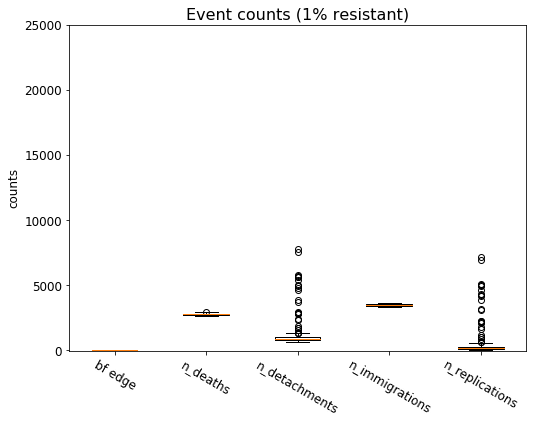

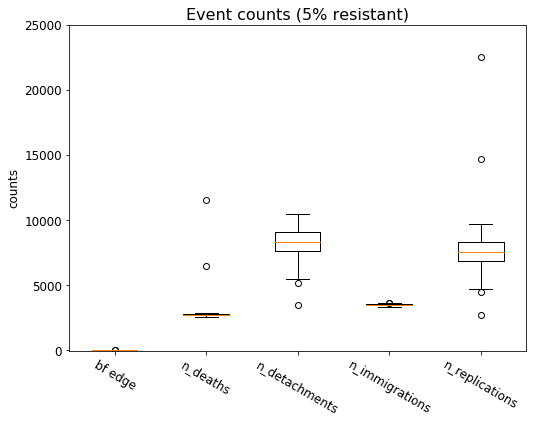

In [73]:
#box_plot_counters(counters_labels_99res, "event_counters_1percent_resistant.pdf", '1')
box_plot_counters(counters_labels_99res_25week, "event_counters_1percent_resistant_25week.pdf", '1')
#box_plot_counters(counters_labels_95res, "event_counters_5percent_resistant.pdf", '5')
box_plot_counters(counters_labels_95res_25week, "event_counters_5percent_resistant_25week.pdf", '5')

In [4]:
def histogramTheCounters(counter_array_and_labels, counter_index, pictitle, pc_res=''):
    
    counter_labels, counter_array = counter_array_and_labels
    pictitle = counter_labels[counter_index]+'_'+pictitle
        
    fig, ax = plt.subplots()
    
    fig.set_size_inches(8.2, 6)
    titleSize = 16
    labelSize = 12
    numberSize = 10
    legendSize = 10
    IDsize=12
    
    n_bins = 100
    cutoff_val = 1000
    
    n, bins, patches = ax.hist(counter_array[counter_index], bins=n_bins, range=(0, max(counter_array[counter_index])))
    #n, bins, patches = ax.hist(np.clip(counter_array[counter_index], 0, cutoff_val), bins=n_bins, range=(0, cutoff_val))
    
    
    ax.set_xlabel(counter_labels[counter_index], fontsize=labelSize)
    ax.set_ylabel('counts', fontsize=labelSize)
    ax.set_title('Histogram of '+counter_labels[counter_index]+' ('+pc_res+'% resistant)', fontsize=titleSize)
    ax.tick_params(axis="x", labelsize=labelSize)
    ax.tick_params(axis="y", labelsize=labelSize)

    # Tweak spacing to prevent clipping of ylabel
    plt.savefig('counters_plots/'+pictitle, bbox_inches='tight')
    plt.show()
    

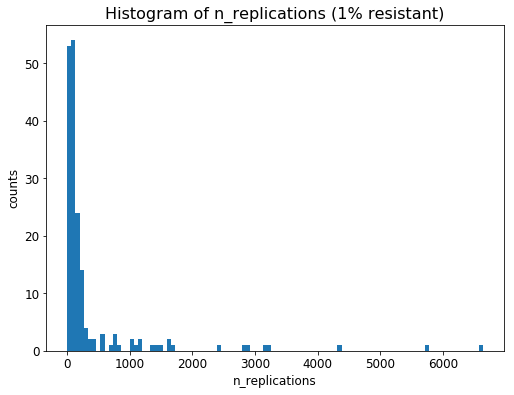

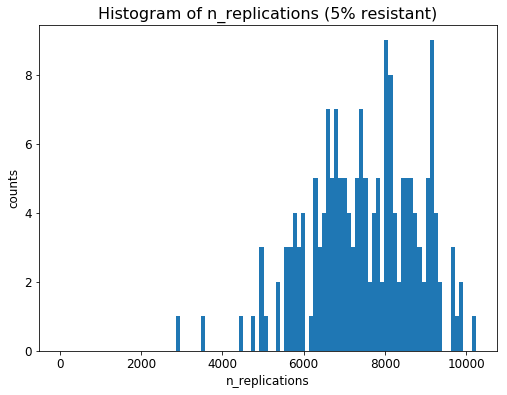

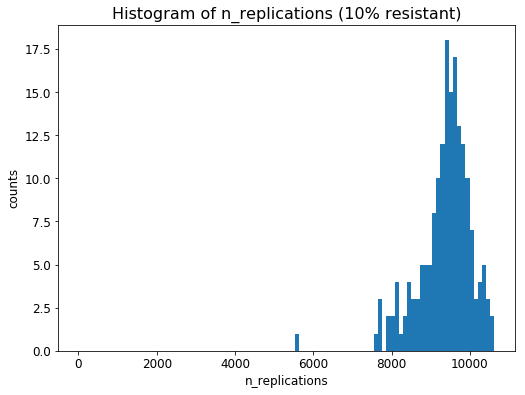

In [8]:
#histogramTheCounters(counters_labels_99res_25week, -1, "histogram_1percentRes_25week.pdf", '1')
#histogramTheCounters(counters_labels_99res, -1, "histogram_1percentRes_10week.pdf", '1')

#histogramTheCounters(counters_labels_95res_25week, -1, "histogram_5percentRes_25week.pdf", '5')
#histogramTheCounters(counters_labels_95res, -1, "histogram_5percentRes_10week.pdf", "5")

histogramTheCounters(countrs_99res, -2, 'histo_1pcRes.pdf', '1')
histogramTheCounters(countrs_95res, -2, 'histo_5pcRes.pdf', '5')
histogramTheCounters(countrs_90res, -2, 'histo_10pcRes.pdf', '10')